# Time Series - AR, MA, ARMA, ARIMA

### What does `statsmodels` include?

"statsmodels" is a comprehensive Python package for statistical modeling and econometrics, offering features such as:

+ Linear regression, generalized linear models (GLM), and Bayesian regression

+ Time series models: AR, MA, ARIMA, SARIMA, VAR, GARCH

+ Descriptive statistics and statistical hypothesis testing

+ Tools for autocorrelation analysis: ACF, PACF, and stationarity tests like the Dickey-Fuller test




### Main Differences: `statsmodels` vs `scikit-learn` in Linear Regression

| Feature               | statsmodels                                                  | scikit-learn                          |
|:----------------------|:-------------------------------------------------------------|:---------------------------------------|
| 🎯 Purpose            | Statistical analysis, inference, interpretation              | Machine learning, prediction           |
| 🧾 Output             | Detailed stats (p-value, adjusted R², SE, CI, t, F)           | Only prediction result and R²          |
| 🔍 Model              | Classical statistics (OLS, GLM, etc.)                        | Purely algorithmic                     |
| 🧠 Bayesian Regression | Available (e.g., `BayesMixedGLM`)                           | Not built-in                           |
| 📊 Statistical Tests  | Yes: t-test, F-test, AIC, BIC, p-values                       | No (must be added manually)            |
| 💡 Explainability     | Strong (p-values, confidence intervals, diagnostics)          | Weaker (no p-values, SE, etc.)         |


### Import the libraries:

In [183]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

### **AR(p)** models:

### **Example 1:** $X_t = 0.3X_{t-1} + 0.2X_{t-2} - 0.6 + \varepsilon_t$

In practice, of course, we don’t know those formulas - we only receive the data.


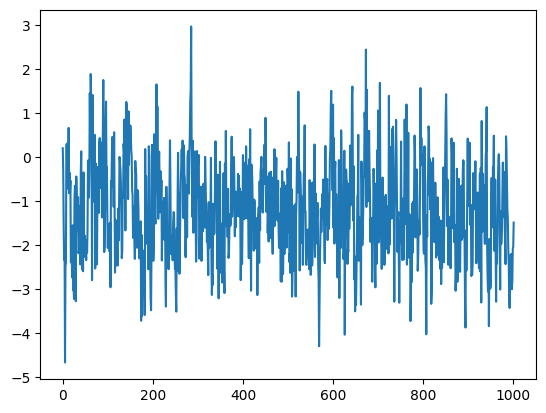

<Figure size 1000x600 with 0 Axes>

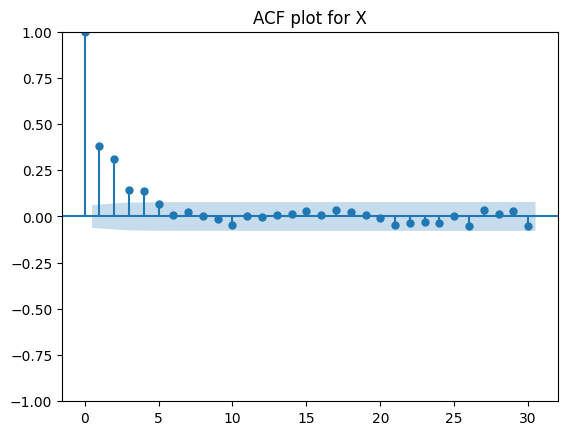

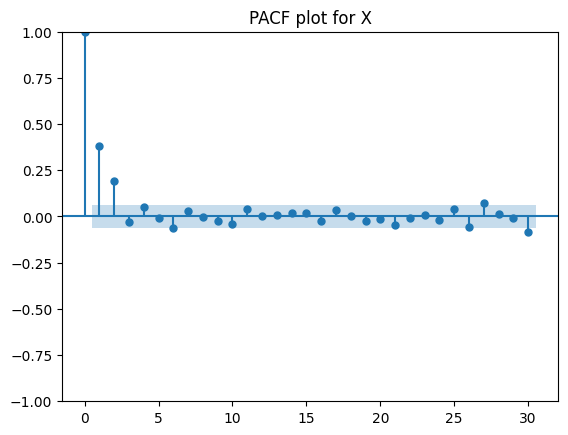

In [184]:
X = [0.2, -0.3]
for i in range(1000):
    X.append(0.3 * X[-1] + 0.2 * X[-2] - 0.6 + np.random.normal(0, 1, 1)[0])

plt.plot(X)
plt.show()

plt.figure(figsize=(10, 6))
plot_acf(X, lags=30)
plt.title('ACF plot for X')
plt.show()

plot_pacf(X, lags=30, method='ywmle')
plt.title('PACF plot for X')
plt.show()

In [185]:
from statsmodels.tsa.ar_model import AutoReg

data = pd.Series(X)

model_ar = AutoReg(data, lags=2)  # model AR(2)
model_ar_fit = model_ar.fit()
print(model_ar_fit.summary())

forecast_ar = model_ar_fit.predict(start=len(data), end=len(data)+4)  # prediction
print(forecast_ar)

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 1002
Model:                     AutoReg(2)   Log Likelihood               -1414.500
Method:               Conditional MLE   S.D. of innovations              0.996
Date:                Thu, 19 Jun 2025   AIC                           2837.000
Time:                        20:21:22   BIC                           2856.631
Sample:                             2   HQIC                          2844.461
                                 1002                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6005      0.052    -11.557      0.000      -0.702      -0.499
y.L1           0.3066      0.031      9.883      0.000       0.246       0.367
y.L2           0.1941      0.031      6.260      0.0

### Conclusions:

The model coefficients are **statistically significant**, since their **𝑝-values < 0.05**, which means we do not reject the null hypothesis - we conclude that both lags `L1` and `L2` have a meaningful impact on the dependent variable.

Regarding **oscillations**, there are **no complex** roots in the characteristic equation, so we do not observe any cyclic or oscillatory behavior in the process.

The model also satisfies the **condition of stationarity** (i.e., stability) because both roots have **moduli greater than 1** (1.68 and 3.38), which ensures the process does not explode over time and that its statistical properties remain constant.

### Now we substitute an incorrect value from the PACF plot -> 3:

In [186]:
from statsmodels.tsa.ar_model import AutoReg

data = pd.Series(X)

model_ar = AutoReg(data, lags=3)  # model AR(3)
model_ar_fit = model_ar.fit()
print(model_ar_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 1002
Model:                     AutoReg(3)   Log Likelihood               -1412.739
Method:               Conditional MLE   S.D. of innovations              0.995
Date:                Thu, 19 Jun 2025   AIC                           2835.479
Time:                        20:21:22   BIC                           2860.013
Sample:                             3   HQIC                          2844.804
                                 1002                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6152      0.055    -11.125      0.000      -0.724      -0.507
y.L1           0.3125      0.032      9.886      0.000       0.251       0.374
y.L2           0.2039      0.032      6.275      0.0

### Conclusions:

The new model coefficient is **not statistically significant**, their **𝑝-values > 0.05**, which means we do reject the null hypothesis - we conclude that lags `L3` have not a meaningful impact on the dependent variable.

### **Example 2:** $X_t = -0.6X_{t-1} + 0.2X_{t-4} + 0.1 + \varepsilon_t$

In practice, of course, we don’t know those formulas - we only receive the data.

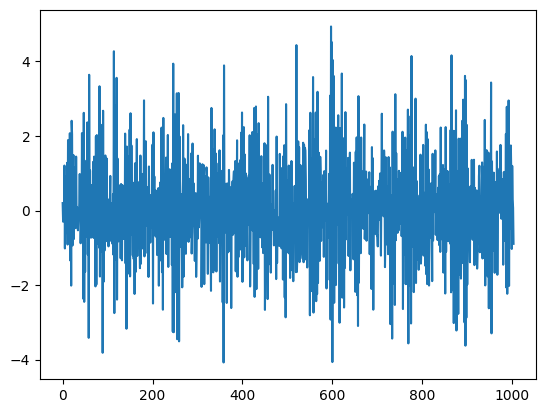

<Figure size 1000x600 with 0 Axes>

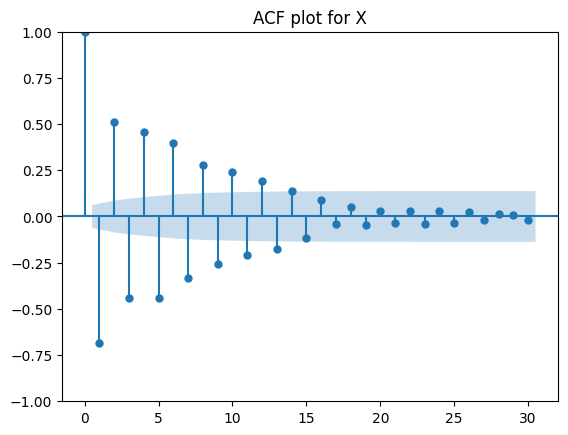

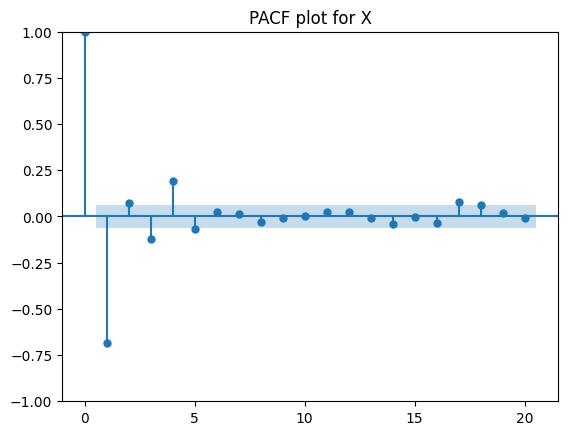

In [187]:
X = [0.2, -0.3, 0.1, -0.2]
for i in range(1000):
    X.append(-0.6 * X[-1] + 0.2 * X[-4] + 0.1 + np.random.normal(0, 1, 1)[0])

plt.plot(X)
plt.show()

plt.figure(figsize=(10, 6))
plot_acf(X, lags=30)
plt.title('ACF plot for X')
plt.show()

plot_pacf(X, lags=20, method='ywmle')
plt.title('PACF plot for X')
plt.show()

In [188]:
from statsmodels.tsa.ar_model import AutoReg

data = pd.Series(X)

model_ar = AutoReg(data, lags=4)  # model AR(4)
model_ar_fit = model_ar.fit()
print(model_ar_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 1004
Model:                     AutoReg(4)   Log Likelihood               -1450.659
Method:               Conditional MLE   S.D. of innovations              1.032
Date:                Thu, 19 Jun 2025   AIC                           2913.317
Time:                        20:21:23   BIC                           2942.764
Sample:                             4   HQIC                          2924.509
                                 1004                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0810      0.033      2.450      0.014       0.016       0.146
y.L1          -0.6062      0.031    -19.539      0.000      -0.667      -0.545
y.L2          -0.0064      0.036     -0.176      0.8

### Conclusions:

In this model, the coefficients for lags `L2` and `L3` are not statistically significant, since their p-values > 0.05, which means we fail to reject the null hypothesis — we conclude that these lags do not have a meaningful impact on the dependent variable. On the other hand, the constant, lag `L1`, and lag `L4` are statistically significant (p-values < 0.05), indicating that they do contribute significantly to explaining the variation in the dependent variable.

### **MA(q)** models:

### $X_t = 0.4 \epsilon_{t-1} - 0.6 \epsilon_{t-3} + 1 + \epsilon_t$

In practice, of course, we don’t know those formulas - we only receive the data.

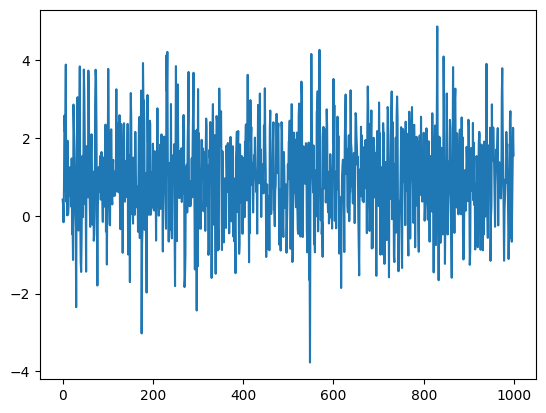

<Figure size 1000x600 with 0 Axes>

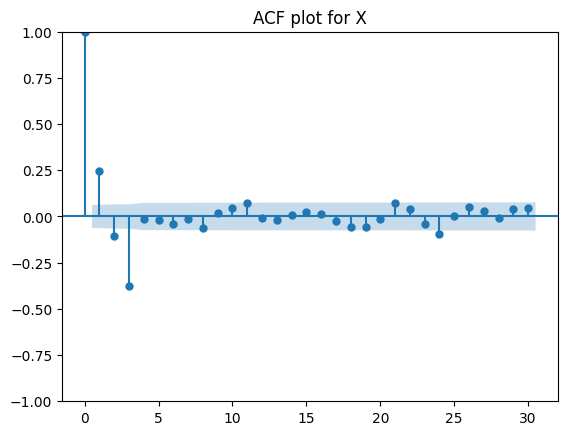

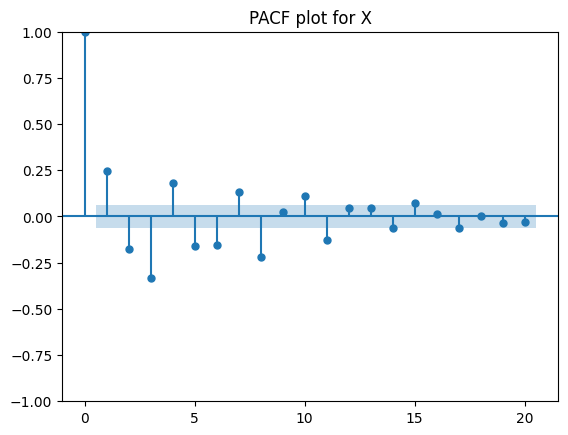

In [189]:
eps = [
    np.random.normal(0, 1, 1)[0],
    np.random.normal(0, 1, 1)[0],
    np.random.normal(0, 1, 1)[0]
]

X = []

for i in range(1000):
    blad_t = np.random.normal(0, 1, 1)[0]
    X.append(0.4 * eps[-1] - 0.6 * eps[-3] + 1 + blad_t)
    eps.append(blad_t)

plt.plot(X)
plt.show()

plt.figure(figsize=(10, 6))
plot_acf(X, lags=30)
plt.title('ACF plot for X')
plt.show()

plot_pacf(X, lags=20, method='ywmle')
plt.title('PACF plot for X')
plt.show()

In [190]:
from statsmodels.tsa.arima.model import ARIMA

data = pd.Series(X)


model_ma = ARIMA(data, order=(0, 0, 3)) # model ARIMA(p,d,q)
model_ma_fit = model_ma.fit()
print(model_ma_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -1401.975
Date:                Thu, 19 Jun 2025   AIC                           2813.949
Time:                        20:21:23   BIC                           2838.488
Sample:                             0   HQIC                          2823.276
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9778      0.025     39.837      0.000       0.930       1.026
ma.L1          0.3862      0.025     15.679      0.000       0.338       0.434
ma.L2          0.0286      0.026      1.112      0.2

### Conclusions:

As with the construction of an AR model, in the MA (Moving Average) model, an additional parameter called `sigma2` appears, which represents the variance of the error term; it measures the unexplained randomness in the model, and the smaller the value of `sigma2`, the better the model fit.

### **ARMA(p,q)** models:

### $X_t = 0.4 X_{t-1} + 0.5 \epsilon_{t-1} - 0.6 \epsilon_{t-3} + 1 + \epsilon_t$

In practice, of course, we don’t know those formulas - we only receive the data.

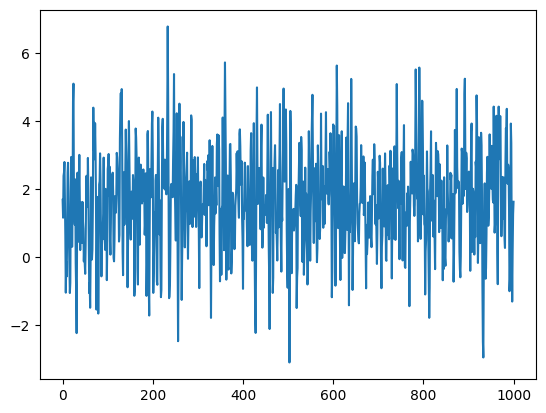

<Figure size 1000x600 with 0 Axes>

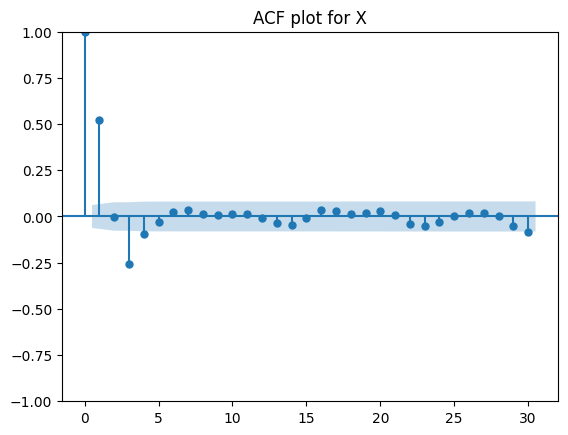

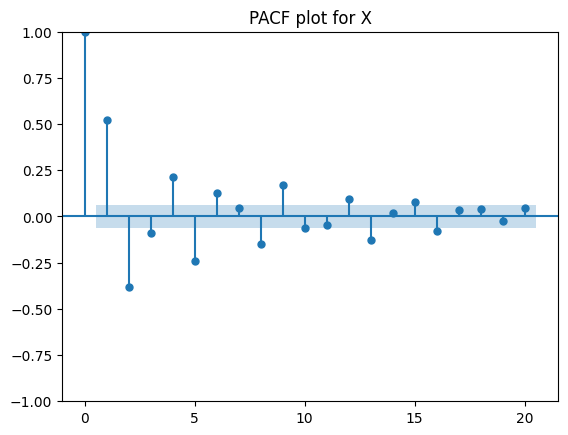

In [191]:
eps = [
    np.random.normal(0, 1, 1)[0],
    np.random.normal(0, 1, 1)[0],
    np.random.normal(0, 1, 1)[0]
]

X = [1.68]

for i in range(1000):
    blad_t = np.random.normal(0, 1, 1)[0]
    X.append(0.4 * X[-1] + 0.5 * eps[-1] - 0.6 * eps[-3] + 1 + blad_t)
    eps.append(blad_t)

plt.plot(X)
plt.show()

plt.figure(figsize=(10, 6))
plot_acf(X, lags=30)
plt.title('ACF plot for X')
plt.show()

plot_pacf(X, lags=20, method='ywmle')
plt.title('PACF plot for X')
plt.show()

In [192]:
data = pd.Series(X)

model_arma = ARIMA(data, order=(1, 0, 3)) # Model ARIMA(p,d,q)
model_arma_fit = model_arma.fit()

print(model_arma_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1001
Model:                 ARIMA(1, 0, 3)   Log Likelihood               -1427.863
Date:                Thu, 19 Jun 2025   AIC                           2867.726
Time:                        20:21:24   BIC                           2897.179
Sample:                             0   HQIC                          2878.920
                               - 1001                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6627      0.054     31.023      0.000       1.558       1.768
ar.L1          0.2303      0.090      2.556      0.011       0.054       0.407
ma.L1          0.6307      0.080      7.896      0.0

In [193]:
data = pd.Series(X)

model_arma = ARIMA(data, order=(1, 0, 4)) # Model ARIMA(p,d,q)
model_arma_fit = model_arma.fit()

print(model_arma_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1001
Model:                 ARIMA(1, 0, 4)   Log Likelihood               -1427.720
Date:                Thu, 19 Jun 2025   AIC                           2869.441
Time:                        20:21:25   BIC                           2903.802
Sample:                             0   HQIC                          2882.500
                               - 1001                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6627      0.053     31.355      0.000       1.559       1.767
ar.L1          0.3896      0.352      1.107      0.268      -0.300       1.079
ma.L1          0.4698      0.354      1.327      0.1

In [194]:
model = ARIMA(data, order=(1, 0, 3))
model_fit = model.fit()

forecast_object = model_fit.get_forecast(steps=5)   # Forecasting

forecast = forecast_object.predicted_mean   # Expected Value (Mean)
conf_int = forecast_object.conf_int(alpha=0.05)     # Confidence Interval Values

print("Forecasted values:\n", forecast)
print("\nConfidence intervals:\n", conf_int)

Forecasted values:
 1001    1.494063
1002    1.987033
1003    1.743017
1004    1.681161
1005    1.666915
Name: predicted_mean, dtype: float64

Confidence intervals:
        lower y   upper y
1001 -0.478222  3.466347
1002 -0.615525  4.589590
1003 -0.948273  4.434307
1004 -1.128402  4.490724
1005 -1.148782  4.482613


### Conclusions:

Due to oscillations in the values on the plots, it is advisable to build several models and choose the best one.

### **ARIMA(p,d,q)** models:

### $X_t = 0.01t + 0.4 X_{t-3} + \epsilon_t$

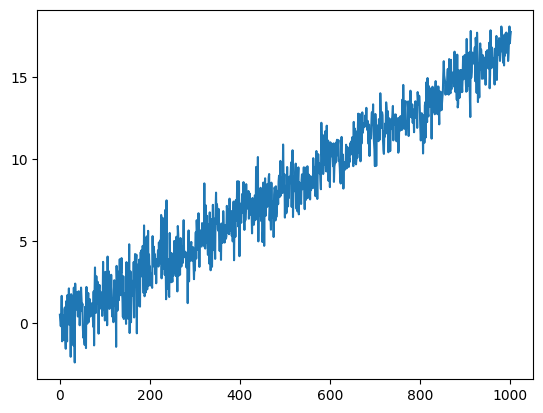

<Figure size 1000x600 with 0 Axes>

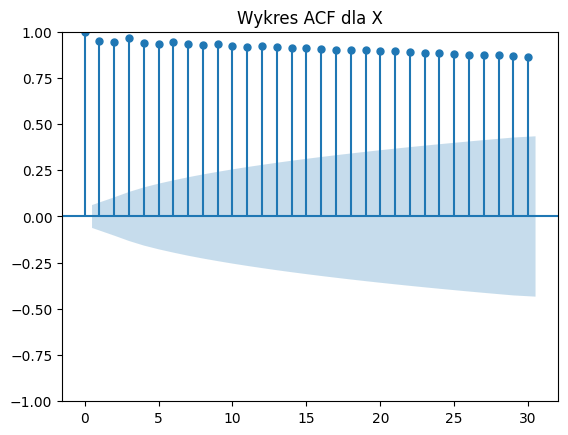

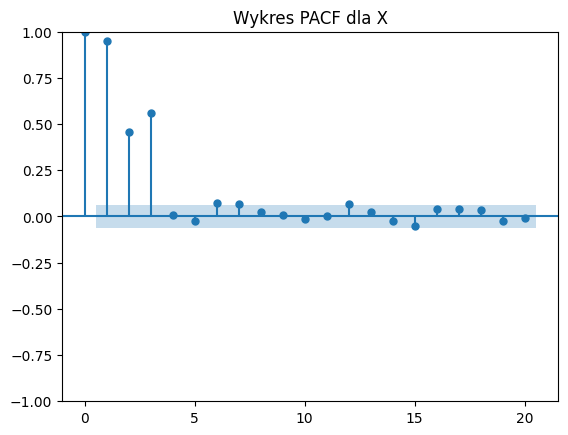

In [195]:
X = [0.5, 0.1, -0.2]
eps = []

for i in range(1000):
    blad_t = np.random.normal(0, 1, 1)[0]
    X.append(0.01 * (i + 1) + 0.4 * X[-3] + blad_t)
    eps.append(blad_t)

plt.plot(X)
plt.show()

plt.figure(figsize=(10, 6))
plot_acf(X, lags=30)
plt.title('Wykres ACF dla X')
plt.show()

plot_pacf(X, lags=20, method='ywmle')
plt.title('Wykres PACF dla X')
plt.show()

### Transforming it into a stationary form!
Our time series does not meet the conditions of stationarity, so we need to transform it into a stationary form:

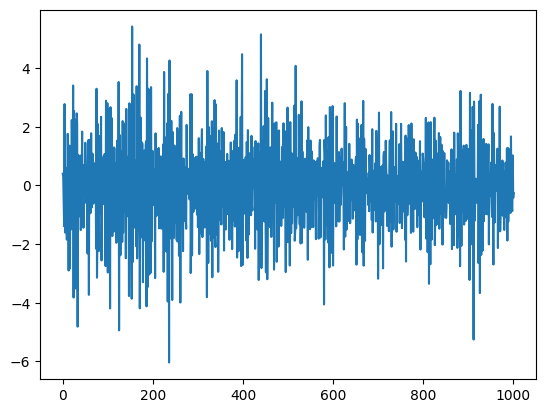

In [196]:
Y = np.array(X[:-1]) - np.array(X[1:])
plt.plot(Y)
plt.show()


### Let's verify mathematically whether the time series X and Y are stationary:

We use ADF (Augmented Dickey-Fuller) tests, which are designed to assess the stationarity of a time series.

It tests the following hypotheses:

+ H₀ (null hypothesis): the series is not stationary (contains a unit root, i.e., has a trend).

+ H₁ (alternative hypothesis): the series is stationary.

By analyzing the test statistic and the corresponding p-value, we can determine whether to reject the null hypothesis and conclude that the series is stationary.

In [197]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(X)

print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -0.10735616507926478
p-value: 0.9487008838648984


$p-value > alfa = 0.05$

We accept the null hypothesis $H_{0}$ - The series is not stationary

In [198]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(Y)

print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -12.703754796957861
p-value: 1.06603791601076e-23


$p-value < alfa = 0.05$

We reject the null hypothesis $H_{0}$ - The series is stationary

## Real data example:

This is a meteorological dataset collected from a single weather station, containing 60 daily measurements. It includes parameters such as minimum, maximum, and average temperature, wind speed, and precipitation levels. The data can be used for climate analysis, weather forecasting, and time series modeling of atmospheric phenomena.

Link: https://rafalraczynski.com.pl/imgw-archiwum/

         data  Tmin[C]  Tmax[C]  Tsr[C]  vmin[km/h]  vmax[km/h]  vsr[km/h]  \
0  2024-07-01     14.5     19.3    16.9         1.0        18.1        9.6   
1  2024-07-02     18.7     25.0    21.8         1.8        25.8       13.8   
2  2024-07-03     19.2     23.6    21.4         0.4        20.7       10.5   
3  2024-07-04     12.1     19.6    15.8         1.5        25.0       13.2   
4  2024-07-05     15.8     22.3    19.0         2.2        15.4        8.8   

   opad[mm]  
0       7.2  
1       9.7  
2       6.6  
3       0.0  
4       9.7  
          data  Tmin[C]  Tmax[C]  Tsr[C]  vmin[km/h]  vmax[km/h]  vsr[km/h]  \
56  2024-08-26     18.4     26.0    22.2         2.0        29.4       15.7   
57  2024-08-27     19.1     27.0    23.0         0.0        20.1       10.0   
58  2024-08-28     21.7     26.7    24.2         1.4        27.0       14.2   
59  2024-08-29     18.8     25.1    22.0         2.3        27.0       14.6   
60  2024-08-30     12.9     20.1    16.5         1.5

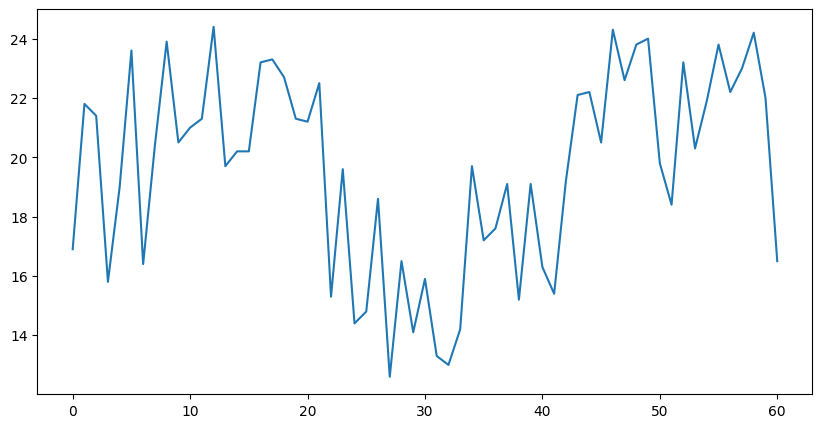

In [199]:
df = pd.read_csv("meteorological/krk.txt", sep=r"\s+")

print(df.head())
print(df.tail())

# Our goal is the column of average temperature
X = df["Tsr[C]"]

# Plot of temperature
fig = plt.figure(figsize=(10, 5))
X.plot()
plt.show()

### Let's verify mathematically whether the time series X is stationary:

In [200]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(X)

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('alfa value: 5% -> 0.05')

ADF Statistic: -2.732505617938323
p-value: 0.06858029368400918
alfa value: 5% -> 0.05


$p-value > alfa = 0.05$

We accept the null hypothesis $H_{0}$ - The series is not stationary

### Transforming it into a stationary form!
Our time series does not meet the conditions of stationarity, so we need to transform it into a stationary form. Since we are using an ARIMA model, we have to keep track of every attempt to make the series stationary:



In [201]:
Y = X.diff().dropna()

In [202]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(Y)

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('alfa value: 5% -> 0.05')

ADF Statistic: -9.596316608479457
p-value: 1.9740017051445005e-16
alfa value: 5% -> 0.05


$p-value < alfa = 0.05$

We reject the null hypothesis $H_{0}$ - The series is stationary

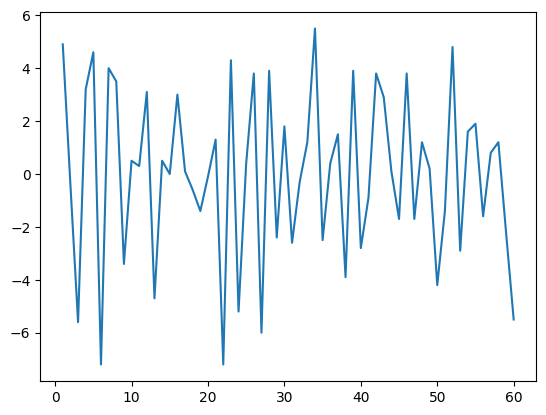

<Figure size 1000x600 with 0 Axes>

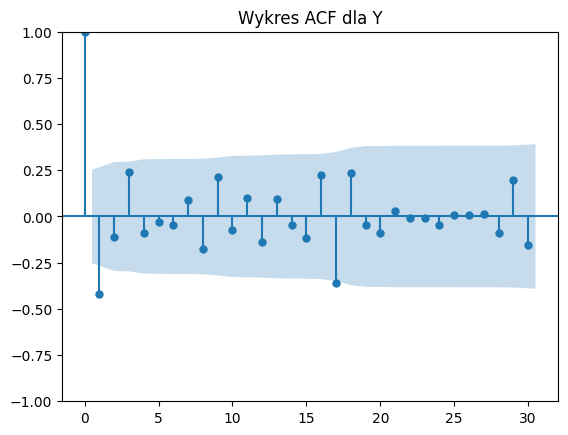

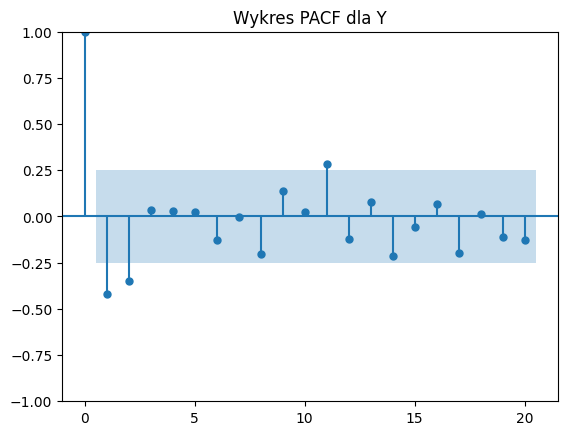

In [203]:
plt.plot(Y)
plt.show()

plt.figure(figsize=(10, 6))
plot_acf(Y, lags=30)
plt.title('Wykres ACF dla Y')
plt.show()

plot_pacf(Y, lags=20, method='ywmle')
plt.title('Wykres PACF dla Y')
plt.show()

In [204]:
data = pd.Series(Y.to_numpy())

model_arma = ARIMA(data, order=(2, 1, 2))  # ARIMA(p=2, d=0, q=2)
model_arma_fit = model_arma.fit()

print(model_arma_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   60
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -144.392
Date:                Thu, 19 Jun 2025   AIC                            298.783
Time:                        20:21:28   BIC                            309.171
Sample:                             0   HQIC                           302.838
                                 - 60                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6841      0.351     -1.949      0.051      -1.372       0.004
ar.L2         -0.4372      0.205     -2.134      0.033      -0.839      -0.036
ma.L1         -0.9585     25.206     -0.038      0.9

In [205]:
plt.show()
data = pd.Series(Y.to_numpy())

model_arma = ARIMA(data, order=(2, 1, 0))  # ARIMA(p=2, d=0, q=2)
model_arma_fit = model_arma.fit()

print(model_arma_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   60
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -155.231
Date:                Thu, 19 Jun 2025   AIC                            316.462
Time:                        20:21:28   BIC                            322.694
Sample:                             0   HQIC                           318.895
                                 - 60                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0247      0.120     -8.519      0.000      -1.260      -0.789
ar.L2         -0.6479      0.110     -5.904      0.000      -0.863      -0.433
sigma2        10.9951      2.424      4.536      0.0

In [206]:
forecast_object = model_arma_fit.get_forecast(steps=3)
forecast = forecast_object.predicted_mean
print(forecast)

conf_int = forecast_object.conf_int()
print(conf_int)

60    0.084497
61   -3.499722
62   -3.445399
Name: predicted_mean, dtype: float64
      lower y   upper y
60  -6.414514  6.583509
61 -10.000716  3.001271
62 -10.393619  3.502821
